# Alignment and fPCA 

## Prepare train data

In [23]:
train_transformed_jfpca <-
  prep_training_data(
    f = sim_train_matrix,
    time = times, 
    fpca_method = "jfpca", # jfPCA
    optim_method = "DPo" # Optimization algorithm
  )

ℹ Using lambda = 0

ℹ Initializing...

ℹ Computing Karcher mean of 75 functions in SRSF space...

ℹ Entering iteration 1...

ℹ Entering iteration 2...



In [24]:
print(length(train_transformed_jfpca))

[1] 3


## Prepare test data

In [25]:
test_transformed_jfpca <-
  prep_testing_data(
    f = sim_test_matrix,
    time = times,
    train_prep = train_transformed_jfpca, # use jfPCA from training data 
    optim_method = "DPo" # Optimization algorithm
  )

In [26]:
cat("train_transformed_jfpca check:\n")
print(names(train_transformed_jfpca))
cat("Has fpca_res:", "fpca_res" %in% names(train_transformed_jfpca), "\n")

train_transformed_jfpca check:
[1] "alignment" "fpca_type" "fpca_res" 
Has fpca_res: TRUE 


In [27]:
cat("test_transformed_jfpca check:\n")
print(names(test_transformed_jfpca))

test_transformed_jfpca check:
 [1] "time" "f0"   "fn"   "q0"   "qn"   "mqn"  "gam"  "coef" "psi"  "nu"  
[11] "g"   


In [28]:
print(length(test_transformed_jfpca))

[1] 11


## Plotting

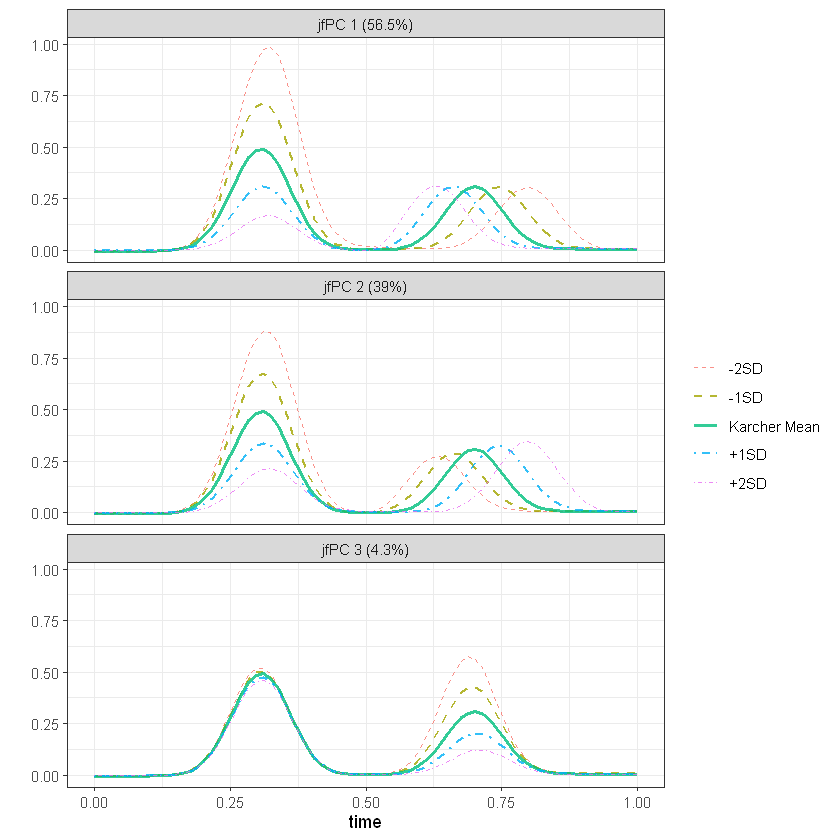

In [29]:
# Plot first 3 joint functional principal components
plot_pc_directions(
  fpcs = 1:3,                    # Plot PC 1 to 3
  fdasrvf = train_transformed_jfpca$fpca_res,  # FPCA results from training
  fpca_method = "jfpca",         # Joint functional PCA method
  times = times,                 # Time vector for x-axis
  digits = 1,                    # Round variance % to 1 decimal
  nrow = 3,                      # Arrange in 3 rows (one PC per row)
  alpha = 0.8,                   # Line transparency
  linesizes = c(0.5, 0.7, 1.0, 0.7, 0.5)  # Line widths: thin-thick-thin pattern
)

Ignoring unknown labels:
• linewidth : ""


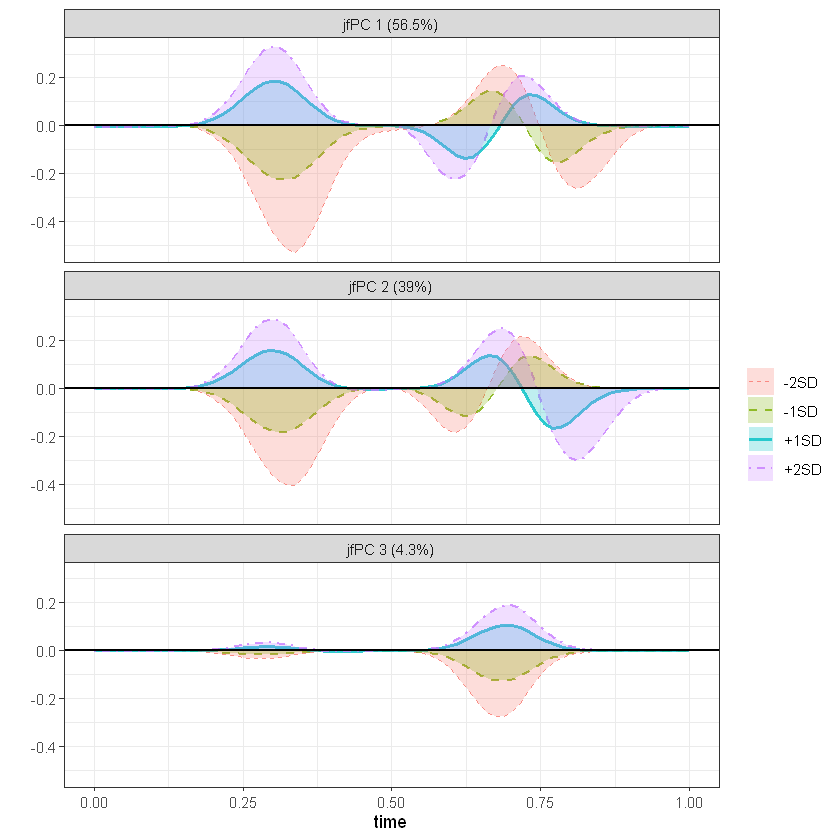

In [30]:
# Plot the differences between jfPCs and the Karcher Mean
plot_pc_diffs(
  fpcs = 1:3,                                   # Plot the first 3 principal components
  fdasrvf = train_transformed_jfpca$fpca_res,   # FPCA results from the training step
  fpca_method = "jfpca",                        # Use the Joint fPCA method
  times = times,                                # Time (or wavenumber) axis
  digits = 1,                                   # Round the explained variance to 1 decimal place
  nrow = 3,                                     # Arrange 1 PC per row
  alpha = 0.8,                                  # Line transparency
  alpha_fill = 0.25,                            # Transparency level for the filled ribbons
  linesizes = c(0.5, 0.7, 1.0, 0.7, 0.5),       # Line thickness pattern (thin–thick–thin)
  mean_linesize = 0.7,                          # Line width for the zero (mean) reference line
  linetype = TRUE,                              # Use dashed lines for ±SD curves
  freey = FALSE                                 # Keep a fixed y-axis scale across all facets
)